In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
import os
import sklearn
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import ShuffleSplit
import glob
#pylab inline
#%matplotlib inline
%matplotlib notebook

C:\Users\T-Gamer\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
path='C:\\Users\\T-Gamer\\Documents\\blog arvore\\inputs'
os.chdir(path)

In [3]:
df=pd.read_csv('MATRICULA_SUDESTE.csv',sep='|') #abrindo um dos arquivos
for c in list(df): #mostrando o nome das colunas
    print(c)

NU_ANO_CENSO
ID_MATRICULA
CO_PESSOA_FISICA
NU_DIA
NU_MES
NU_ANO
NU_IDADE_REFERENCIA
NU_IDADE
NU_DURACAO_TURMA
NU_DUR_ATIV_COMP_MESMA_REDE
NU_DUR_ATIV_COMP_OUTRAS_REDES
NU_DUR_AEE_MESMA_REDE
NU_DUR_AEE_OUTRAS_REDES
NU_DIAS_ATIVIDADE
TP_SEXO
TP_COR_RACA
TP_NACIONALIDADE
CO_PAIS_ORIGEM
CO_UF_NASC
CO_MUNICIPIO_NASC
CO_UF_END
CO_MUNICIPIO_END
TP_ZONA_RESIDENCIAL
TP_OUTRO_LOCAL_AULA
IN_TRANSPORTE_PUBLICO
TP_RESPONSAVEL_TRANSPORTE
IN_TRANSP_VANS_KOMBI
IN_TRANSP_MICRO_ONIBUS
IN_TRANSP_ONIBUS
IN_TRANSP_BICICLETA
IN_TRANSP_TR_ANIMAL
IN_TRANSP_OUTRO_VEICULO
IN_TRANSP_EMBAR_ATE5
IN_TRANSP_EMBAR_5A15
IN_TRANSP_EMBAR_15A35
IN_TRANSP_EMBAR_35
IN_TRANSP_TREM_METRO
IN_NECESSIDADE_ESPECIAL
IN_CEGUEIRA
IN_BAIXA_VISAO
IN_SURDEZ
IN_DEF_AUDITIVA
IN_SURDOCEGUEIRA
IN_DEF_FISICA
IN_DEF_INTELECTUAL
IN_DEF_MULTIPLA
IN_AUTISMO
IN_SINDROME_ASPERGER
IN_SINDROME_RETT
IN_TRANSTORNO_DI
IN_SUPERDOTACAO
IN_RECURSO_LEDOR
IN_RECURSO_TRANSCRICAO
IN_RECURSO_INTERPRETE
IN_RECURSO_LIBRAS
IN_RECURSO_LABIAL
IN_RECURSO_BRAILLE
I

In [4]:
for c in list(df): #mostrando o nome e valores das colunas
    print(df[c].head())

0    2015
1    2015
2    2015
3    2015
4    2015
Name: NU_ANO_CENSO, dtype: int64
0    107335309
1     19997006
2     22336558
3     19979804
4     22198039
Name: ID_MATRICULA, dtype: int64
0    121202358488
1    120976289902
2    121732549957
3    121374908540
4    122003406726
Name: CO_PESSOA_FISICA, dtype: int64
0     6
1    26
2    11
3     8
4    13
Name: NU_DIA, dtype: int64
0    1
1    9
2    4
3    2
4    3
Name: NU_MES, dtype: int64
0    2007
1    2006
2    2007
3    2007
4    2007
Name: NU_ANO, dtype: int64
0    8
1    8
2    8
3    8
4    8
Name: NU_IDADE_REFERENCIA, dtype: int64
0    8
1    9
2    8
3    8
4    8
Name: NU_IDADE, dtype: int64
0    240.0
1    240.0
2    240.0
3    240.0
4    240.0
Name: NU_DURACAO_TURMA, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: NU_DUR_ATIV_COMP_MESMA_REDE, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: NU_DUR_ATIV_COMP_OUTRAS_REDES, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 

In [5]:
evasao=pd.DataFrame()

for f in glob.glob('*.csv'): #unindo os arquivos mas lendo só as colunas que usaremos por causa da memória
    df=pd.read_csv(f,sep='|',usecols=['NU_ANO','NU_MES','TP_TIPO_TURMA','IN_REGULAR','TP_ETAPA_ENSINO','NU_ANO_CENSO','CO_PESSOA_FISICA','TP_SEXO','TP_COR_RACA','CO_UF','TP_ZONA_RESIDENCIAL','TP_DEPENDENCIA','TP_LOCALIZACAO'])
    df=df[~df['TP_TIPO_TURMA'].isin([4,5])] #tirando alunos especiais
    del df['TP_TIPO_TURMA']
    df=df[df['IN_REGULAR']==1] #só mantendo alunos do ensino regular
    del df['IN_REGULAR']
    df=df[~df['TP_ETAPA_ENSINO'].isin([27,28,29,32,33,34,37,38,1,2])] #tirando alunos de turmas multiseriadas, etc
    df['etapa']=''
    df.ix[df['TP_ETAPA_ENSINO']==14,'etapa']=1 #primeira série
    df.ix[df['TP_ETAPA_ENSINO'].isin([4,15]),'etapa']=2 #segunda séries
    df.ix[df['TP_ETAPA_ENSINO'].isin([5,16]),'etapa']=3 #...
    df.ix[df['TP_ETAPA_ENSINO'].isin([6,17]),'etapa']=4
    df.ix[df['TP_ETAPA_ENSINO'].isin([7,18]),'etapa']=5
    df.ix[df['TP_ETAPA_ENSINO'].isin([8,19]),'etapa']=6
    df.ix[df['TP_ETAPA_ENSINO'].isin([9,20]),'etapa']=7
    df.ix[df['TP_ETAPA_ENSINO'].isin([10,21]),'etapa']=8
    df.ix[df['TP_ETAPA_ENSINO'].isin([11,41]),'etapa']=9
    df.ix[df['TP_ETAPA_ENSINO'].isin([25,30,35]),'etapa']=10
    df.ix[df['TP_ETAPA_ENSINO'].isin([26,31,36]),'etapa']=11
    df.ix[df['TP_ETAPA_ENSINO'].isin([27,32,37]),'etapa']=12
    df.ix[df['TP_ETAPA_ENSINO'].isin([28,33,38]),'etapa']=13
    df.ix[df['TP_ETAPA_ENSINO'].isin([29,34]),'etapa']=14
    df=df[df['etapa']!=''] #jogando fora linhas vazias
    df=df[df['etapa']<=11] #jogando fora alunos que podem ter terminado o ensino médio
    df['idade_calculada']='' #calculo da idade arredondada para achar idade certa
    df.ix[df['NU_MES']<=6,'idade_calculada']=2016-df['NU_ANO'] 
    df.ix[df['NU_MES']>6,'idade_calculada']=2016-df['NU_ANO']
    del df['NU_ANO']
    del df['NU_MES']
    df['Anos_de_Atraso']=df['idade_calculada']-df['etapa']-5 #calculo de anos de atraso
    df=df[df['Anos_de_Atraso']>-3]
    df=df[df['idade_calculada']<=17] #mantendo só alunos não aptos ao supletivo
    del df['idade_calculada']
    evasao=pd.concat([evasao,df])

In [6]:
del df
evasao=evasao.drop_duplicates(subset=['NU_ANO_CENSO', 'CO_PESSOA_FISICA']) #jogando fora pessoas que no mesmo ano aparecem várias vezes
evasao['Evasao']=0 #valor inicial de não evasao
evasao['repeticoes']=evasao.groupby('CO_PESSOA_FISICA')['CO_PESSOA_FISICA'].transform('count') #conta quantas vezes a mesma pessoa aparece na amostra independente do ano
del evasao['CO_PESSOA_FISICA']
evasao.ix[(evasao['repeticoes']==1) & (evasao['NU_ANO_CENSO']==2015),'Evasao']=1 #se uma pessoa aparece só uma vez na amostra quer dizer que ela abandonou a escola em 2016
del evasao['repeticoes']

In [7]:
evasao=evasao[evasao['NU_ANO_CENSO']==2015] #Agora que já temos os evadidos podemos usar só os dados de 2015
import math
evasao['Regiao']=evasao['CO_UF'].apply(lambda s: math.floor(s/10)) #o primeiro dígito do estado sempre representa a regiao
del evasao['CO_UF']
del evasao['TP_ETAPA_ENSINO']
del evasao['NU_ANO_CENSO']
evasao=evasao.rename(columns={'TP_SEXO':'Feminino','TP_COR_RACA':'Raca','TP_ZONA_RESIDENCIAL':'Residencia_Rural',
                              'TP_DEPENDENCIA':'Dependencia_Administrativa','TP_LOCALIZACAO':'Escola_Rural','etapa':'Etapa'})

In [8]:
evasao=evasao[evasao['Raca']!=0] #deletando as entradas com raça não declarada

evasao=evasao[evasao['Anos_de_Atraso']>=0] #jogando fora dados de pessoas com informações incorretas


evasao.ix[evasao['Residencia_Rural']==1,'Residencia_Rural']=0
evasao.ix[evasao['Residencia_Rural']==2,'Residencia_Rural']=1  

evasao.ix[evasao['Escola_Rural']==1]=0
evasao.ix[evasao['Escola_Rural']==2]=1

In [9]:
evasao.groupby('Evasao').count()

,Feminino,Raca,Residencia_Rural,Dependencia_Administrativa,Escola_Rural,Etapa,Anos_de_Atraso,Regiao
Evasao,,,,,,,,
0,19332633,19332633,19332633,19332633,19332633,19332633,19332633,19332633
1,2738659,2738659,2738659,2738659,2738659,2738659,2738659,2738659


In [3]:
evasao=pd.read_csv('C:\\Users\\T-Gamer\\Documents\\arvore de decisao\\evasao_4.csv',sep=";")

In [11]:
evasao.head(100)

,Unnamed: 0,Feminino,Residencia_Rural,Escola_Rural,Etapa,Anos_de_Atraso,Evasao,Branca,Norte,Nordeste,Sudeste,Sul,Centro_Oeste,Escola_Federal,Escola_Estadual,Escola_Municipal,Escola_Privada
0,2,1,0,0,8,3,0,0,0,0,0,0,1,0,0,0,1
1,8,0,0,0,8,2,0,0,0,0,0,0,1,0,0,0,1
2,17,1,0,0,8,1,0,0,0,0,0,0,1,0,0,0,1
3,19,1,0,0,8,1,0,1,0,0,0,0,1,0,0,0,1
4,21,1,0,0,8,1,0,1,0,0,0,0,1,0,0,0,1
5,24,0,0,0,8,2,0,0,0,0,0,0,1,0,0,0,1
6,26,0,0,0,8,2,0,0,0,0,0,0,1,0,0,0,1
7,27,0,0,0,8,1,0,0,0,0,0,0,1,0,0,0,1
8,28,0,0,0,8,2,0,0,0,0,0,0,1,0,0,0,1
9,29,1,0,0,8,2,0,1,0,0,0,0,1,0,0,0,1


In [12]:
evasao.info()

feat=['Etapa','Anos_de_Atraso']

for feature in feat:
    print(u'Feature {} possui os valores únicos: {}'.format(feature, evasao[feature].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22071292 entries, 0 to 22071291
Data columns (total 17 columns):
Unnamed: 0          int64
Feminino            int64
Residencia_Rural    int64
Escola_Rural        int64
Etapa               int64
Anos_de_Atraso      int64
Evasao              int64
Branca              int64
Norte               int64
Nordeste            int64
Sudeste             int64
Sul                 int64
Centro_Oeste        int64
Escola_Federal      int64
Escola_Estadual     int64
Escola_Municipal    int64
Escola_Privada      int64
dtypes: int64(17)
memory usage: -1293271504.0 bytes
Feature Etapa possui os valores únicos: [ 8 11  9  3  1  6  7  2  4  5 10]
Feature Anos_de_Atraso possui os valores únicos: [ 3  2  1  0  4  5  6  7  8  9 10 11]


In [4]:
porEvasao=evasao.groupby(['Evasao'])
porEvasao.describe()

Anos_de_Atraso        Branca  Centro_Oeste  Escola_Estadual  \
Evasao                                                                      
0      count    1.982527e+07  1.982527e+07  1.982527e+07     1.982527e+07   
       mean     1.823344e+00  4.603617e-01  6.793901e-02     3.092675e-01   
       std      9.197470e-01  4.984263e-01  2.516412e-01     4.621916e-01   
       min      0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       25%      1.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       50%      2.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       75%      2.000000e+00  1.000000e+00  0.000000e+00     1.000000e+00   
       max      1.100000e+01  1.000000e+00  1.000000e+00     1.000000e+00   
1      count    2.246025e+06  2.246025e+06  2.246025e+06     2.246025e+06   
       mean     1.964296e+00  4.171690e-01  6.656115e-02     4.815574e-01   
       std      1.416888e+00  4.930914e-01  2.492605e-01     4.996599e-01   
       min      0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       25%      1.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       50%      1.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
       75%      2.000000e+00  1.000000e+00  0.000000e+00     1.000000e+00   
       max      1.100000e+01  1.000000e+00  1.000000e+00     1.000000e+00   

              Escola_Federal  Escola_Municipal  Escola_Privada  Escola_Rural  \
Evasao                                                                         
0      count    1.982527e+07      1.982527e+07    1.982527e+07  1.982527e+07   
       mean     2.014046e-03      5.343216e-01    1.543969e-01  1.260005e-01   
       std      4.483291e-02      4.988207e-01    3.613288e-01  3.318500e-01   
       min      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00   
       25%      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00   
       50%      0.000000e+00      1.000000e+00    0.000000e+00  0.000000e+00   
       75%      0.000000e+00      1.000000e+00    0.000000e+00  0.000000e+00   
       max      1.000000e+00      1.000000e+00    1.000000e+00  1.000000e+00   
1      count    2.246025e+06      2.246025e+06    2.246025e+06  2.246025e+06   
       mean     5.639741e-03      3.647845e-01    1.480184e-01  1.071515e-01   
       std      7.488616e-02      4.813698e-01    3.551183e-01  3.093059e-01   
       min      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00   
       25%      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00   
       50%      0.000000e+00      0.000000e+00    0.000000e+00  0.000000e+00   
       75%      0.000000e+00      1.000000e+00    0.000000e+00  0.000000e+00   
       max      1.000000e+00      1.000000e+00    1.000000e+00  1.000000e+00   

                     Etapa      Feminino      Nordeste         Norte  \
Evasao                                                                 
0      count  1.982527e+07  1.982527e+07  1.982527e+07  1.982527e+07   
       mean   5.172657e+00  4.906711e-01  2.661116e-01  9.888356e-02   
       std    2.729984e+00  4.999130e-01  4.419233e-01  2.985056e-01   
       min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       50%    5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       75%    7.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
       max    1.100000e+01  1.000000e+00  1.000000e+00  1.000000e+00   
1      count  2.246025e+06  2.246025e+06  2.246025e+06  2.246025e+06   
       mean   7.460506e+00  5.053074e-01  3.304500e-01  1.047976e-01   
       std    3.288804e+00  4.999719e-01  4.703753e-01  3.062925e-01   
       min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       25%    5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       50%    8.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
       75%    1.100000e+01  1.0000

In [5]:
densidade_conjunta_1=evasao[evasao.Evasao==1].groupby(['Etapa','Anos_de_Atraso']).count() #contar quantos evadiram por série e anos de atraso
densidade_conjunta_2=evasao.groupby(['Etapa','Anos_de_Atraso']).count() #contar número de alunos por série e anos de atraso
print('d1')
print(densidade_conjunta_1)
print('d2')
print(densidade_conjunta_2)

d1
                      Unnamed: 0  Feminino  Residencia_Rural  Escola_Rural  \
Etapa Anos_de_Atraso                                                         
1     0                      915       915               915           915   
      1                    44460     44460             44460         44460   
      2                    61997     61997             61997         61997   
      3                     5165      5165              5165          5165   
      4                     1810      1810              1810          1810   
      5                     1078      1078              1078          1078   
      6                      786       786               786           786   
      7                      674       674               674           674   
      8                      562       562               562           562   
      9                      577       577               577           577   
      10                     834       834               834 

In [6]:
den=densidade_conjunta_1/densidade_conjunta_2
densid=den["Feminino"] #proporção de evadidos em cada tupla anos de atraso e série
densid_2=densidade_conjunta_2['Feminino']/len(evasao) #proporção de alunos em cada tupla anos de atraso e série
print(len(evasao))
print(densid_2)

22071292
Etapa  Anos_de_Atraso
1      0                 0.000142
       1                 0.036695
       2                 0.055684
       3                 0.002124
       4                 0.000604
       5                 0.000340
       6                 0.000238
       7                 0.000189
       8                 0.000154
       9                 0.000132
       10                0.000128
       11                0.000087
2      0                 0.000281
       1                 0.036294
       2                 0.057159
       3                 0.003727
       4                 0.001034
       5                 0.000441
       6                 0.000246
       7                 0.000154
       8                 0.000105
       9                 0.000078
       10                0.000045
3      0                 0.000248
       1                 0.034392
       2                 0.061125
       3                 0.009530
       4                 0.003465
       5         

In [16]:
print(densid) #evadidos

Etapa  Anos_de_Atraso
1      0                 0.292332
       1                 0.054896
       2                 0.050444
       3                 0.110189
       4                 0.135784
       5                 0.143638
       6                 0.149515
       7                 0.161631
       8                 0.165246
       9                 0.197332
       10                0.294908
       11                0.466111
2      0                 0.137975
       1                 0.050133
       2                 0.046386
       3                 0.085709
       4                 0.107977
       5                 0.131852
       6                 0.164361
       7                 0.210371
       8                 0.264541
       9                 0.316279
       10                0.324517
3      0                 0.124086
       1                 0.047626
       2                 0.044433
       3                 0.064062
       4                 0.080856
       5                 0

In [7]:
print(densid.index.names)
densidad=pd.DataFrame(densid)
densidad_2=pd.DataFrame(densid_2)

['Etapa', 'Anos_de_Atraso']


In [ ]:
#limpando espaço memória

del evasao_5 
del evasao_4 
del densidad 
del densidad_2 
del densid 
del densid_2 
del densidade_conjunta_1 
del densidade_conjunta_2 
del porEvasao
del evasao['Escola_Rural']

In [22]:
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus
from sklearn.preprocessing import OneHotEncoder

import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#import seaborn as sns
import seaborn.apionly as sns

%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_list=['Feminino','Residencia_Rural','Etapa','Anos_de_Atraso','Branca','Norte','Nordeste','Sudeste','Sul','Centro_Oeste','Escola_Federal','Escola_Estadual','Escola_Municipal','Escola_Privada']
evasao=evasao.head(1000000)#reduzindo amostra por causa da memória
evasao[features_list]=scaler.fit_transform(evasao[features_list]) #ajustando a escala das features

from sklearn.model_selection import ShuffleSplit

reparticoes = ShuffleSplit(n_splits=10, test_size=.25, random_state=0)

y=evasao.Evasao

avaliacao_tree=0
round_acc_tree_med=0
avaliacao_linreg=0
round_acc_lin_med=0

for train_index, test_index in reparticoes.split(evasao[features_list]):
    X_train = evasao[features_list].ix[train_index]
    Y_train = evasao.Evasao.ix[train_index]
    X_test  = evasao[features_list].ix[test_index]
    Y_test = evasao.Evasao.ix[test_index]
    
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
    print('Acurácia da árvore')
    print(acc_decision_tree)
    avaliacao_tree=avaliacao_tree+ acc_decision_tree/10
    tree_round=Y_pred>=0.5
    acc_decision_tree_round = round(decision_tree.score(X_test, tree_round) * 100, 2)
    round_acc_tree_med=round_acc_tree_med+acc_decision_tree_round/10

    scores = cross_val_score(decision_tree, X_train, Y_train)
    cvs_decision_tree = np.mean(scores)
    print('Cross-Validation da Árvore')
    print(cvs_decision_tree*100)
    
    
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)
    Y_pred = linreg.predict(X_test)
    acc_lin = round(linreg.score(X_test, Y_test) * 100, 2)
    print('Acurácia da regressão linear')
    print(acc_lin)
    avaliacao_linreg=avaliacao_linreg+acc_lin/10
    lin_round=Y_pred>=0.5
    acc_decision_lin_round = round(linreg.score(X_test, lin_round) * 100, 2)
    round_acc_lin_med=round_acc_lin_med+acc_decision_lin_round/10

    scores = cross_val_score(linreg, X_train, Y_train, cv=10)
    cvs_linreg = np.mean(scores)
    print('Cross-Validation da Regressão Linear')
    print(cvs_linreg*100)
print('Avaliação da arvore:')
print(avaliacao_tree)

print('Avaliação da arvore arrendondado:')
print(round_acc_tree_med)

print('Avaliação do OLS:')
print(avaliacao_linreg)

print('Avaliação do OLS arrendondado:')
print(round_acc_lin_med)

C:\Users\T-Gamer\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\T-Gamer\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Acurácia da árvore
93.44
Cross-Validation da Árvore
93.3378666667
Acurácia da regressão linear
4.67
Cross-Validation da Regressão Linear
4.68453553217
Acurácia da árvore
93.31
Cross-Validation da Árvore
93.3718666303
Acurácia da regressão linear
4.61
Cross-Validation da Regressão Linear
4.70363045405
Acurácia da árvore
93.3
Cross-Validation da Árvore
93.3805333333
Acurácia da regressão linear
4.69
Cross-Validation da Regressão Linear
4.67505263678
Acurácia da árvore
93.36
Cross-Validation da Árvore
93.3532
Acurácia da regressão linear
4.38
Cross-Validation da Regressão Linear
4.77999714467
Acurácia da árvore
93.44
Cross-Validation da Árvore
93.3294665594
Acurácia da regressão linear
4.75
Cross-Validation da Regressão Linear
4.6590850543
Acurácia da árvore
93.34
Cross-Validation da Árvore
93.3694665999
Acurácia da regressão linear
4.64
Cross-Validation da Regressão Linear
4.6940281333
Acurácia da árvore
93.4
Cross-Validation da Árvore
93.3399999967
Acurácia da regressão linear
4.56
Cros

In [24]:
evasao=pd.read_csv('C:\\Users\\T-Gamer\\Documents\\arvore de decisao\\evasao_3.csv',sep=";") #recuperando base original completa

clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=0.05)
features_list=['Feminino','Residencia_Rural','Etapa','Anos_de_Atraso','Branca','Norte','Nordeste','Sudeste','Sul','Centro_Oeste','Escola_Federal','Escola_Estadual','Escola_Municipal','Escola_Privada']
clf.fit(evasao[features_list],evasao.Evasao)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=0.05,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

[  4.80514194e-08   3.80981805e-03   6.23902149e-02   7.91985032e-01
   7.14631893e-03   0.00000000e+00   2.10444323e-02   1.00121893e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.35022423e-02   0.00000000e+00]


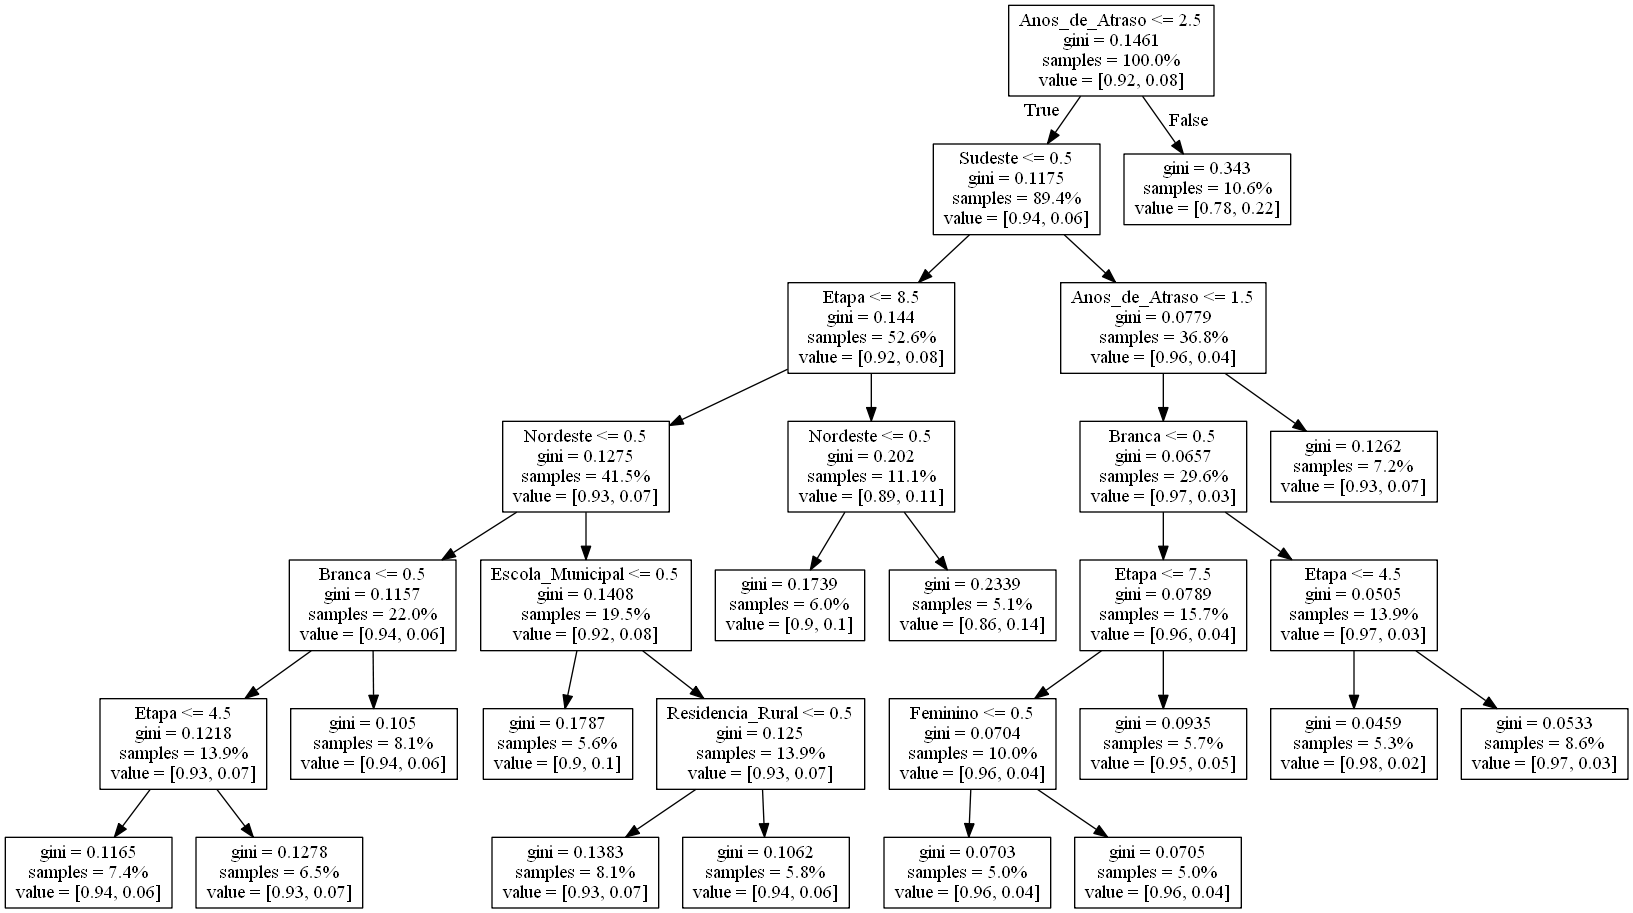

In [25]:
print(clf.feature_importances_)
dot_data=StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list,proportion=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
from sklearn import model_selection

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [27]:
y_true=evasao.Evasao
Y_pred = clf.predict(evasao[features_list])

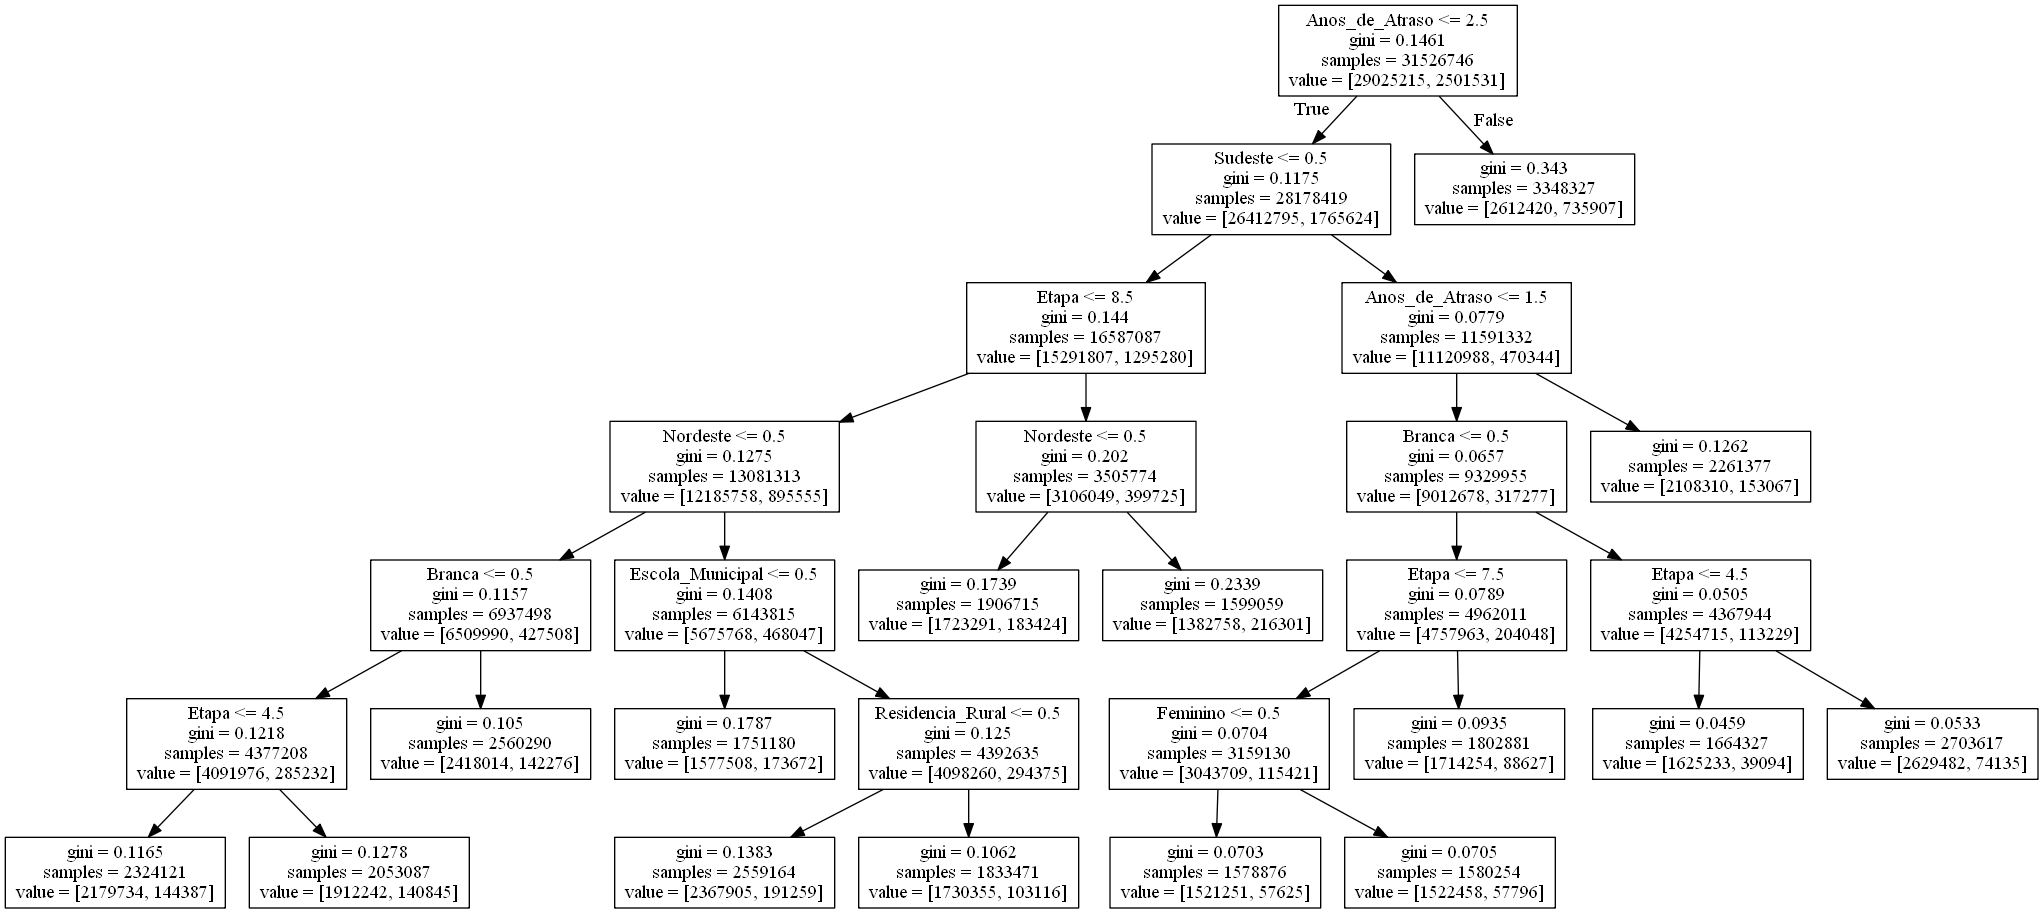

In [30]:
with open("Evasao.dot","w") as f:
    f=tree.export_graphviz(clf,out_file=f,feature_names=features_list)

!dot -Tpng Evasao.dot -o evasao.png
Image('evasao.png')